In [66]:
#INIT PROCEDURE

INFO:DT:Loaded homography for dori


(480, 640, 3)
[[    0.           676.08392334   917.40618896  2050.41821289]
 [  211.45050049   822.78125      818.50994873     0.        ]]
WARP PERSPECTIVE TOOK: seconds
0.00375699996948


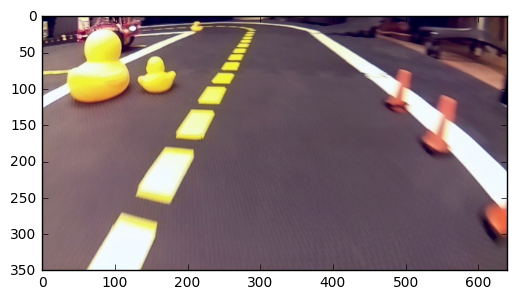

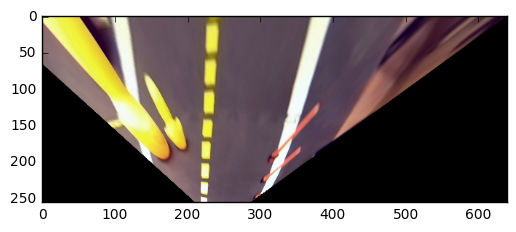

In [103]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from skimage import measure
from duckietown_utils import load_map, load_camera_intrinsics, load_homography, rectify
from numpy.linalg import inv
#doing obstacle detection exploiting the color and an inverse homography such that all objects keep their basic size!
#improvements: more restrictive yellow filter
#decision if duckie or not done by size only since the ducks are not a flat object on the plane that is why they are
#significantly larger!!!
#the transformation has to be validated under other homographies



H = load_homography('dori')
#print H
#print np.dot(H, [600,600,1])
filename = '/home/niggi/savior_bags/21.12./Record6/8_pics/114.jpg'
#filename = '/home/niggi/savior_bags/19.12.bags/1/6_pics/59.jpg'
im1 = cv2.imread(filename) #reads BGR
print np.shape(im1)
im1_cropped = im1[130:,:,:]
im1_orig=np.copy(im1_cropped)
#plt.imshow(im1_cropped); plt.show()


#STUFF FOR TRANSFORMING THE IMAGE
x0=0
x1=640
y0=50
y1=350
pts1 = np.float32([[x0,y0],[x0,y1],[x1,y1],[x1,y0]])
pts1_h = np.float32([[x0,y0+130,1],[x0,y1+130,1],[x1,y1+130,1],[x1,y0+130,1]])
#add the crop offset to being able to calc real world coordinates correctly!!!
pts2_h = np.dot(H,np.transpose(pts1_h))

pts2 = np.float32((pts2_h[0:2,:]/pts2_h[2,:]*1000))
maximum_height = np.max([pts2[0,:]])
maximum_left = np.max([pts2[1,:]])
#print pts2
#determine points number 2!!!


pts2 = np.flipud(np.float32((np.float32([[maximum_height],[maximum_left]])-pts2)))
print pts2
max_x = int(np.max(pts2[0]))
factor_x = 640.0/max_x
max_y = int(np.max(pts2[1]))
factor_y = 300.0/max_y
pts2 = pts2*np.float32([[factor_x],[factor_x]])
#flipud only cause world frame is flipped,..

M = cv2.getPerspectiveTransform(pts1,np.transpose(pts2))
inv_M = inv(M)

start = time.time()
im_test = cv2.warpPerspective(im1_cropped,M,(int(np.max(pts2[0])),int(np.max(pts2[1])))) #for dori
end = time.time()
print "WARP PERSPECTIVE TOOK: seconds"
print(end - start)
#im_test = cv2.warpPerspective(im1_cropped,M,(3000,1280)) # for arki
plt.imshow(im1_cropped[:,:,::-1]); plt.show()
plt.imshow(im_test[:,:,::-1]); plt.show()
#This is the birds perspective view!




In [104]:
# Convert BGR to HSV FOR BEING ABLE TO APPLY FILTERS NOW!!!
hsv = cv2.cvtColor(im_test, cv2.COLOR_BGR2HSV)

White filtered img
0.000396966934204


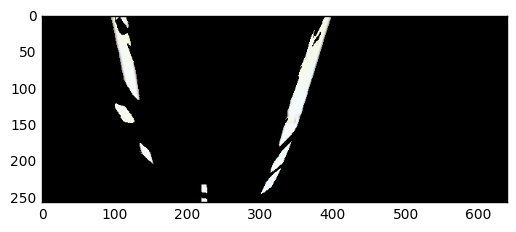

Orange filtered img
0.000356912612915
0.000439882278442


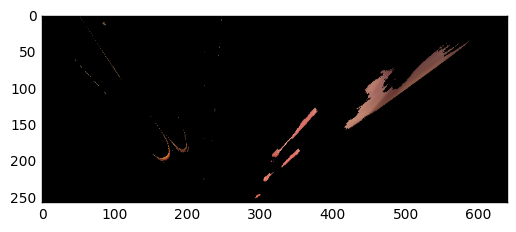

Yellow filtered img


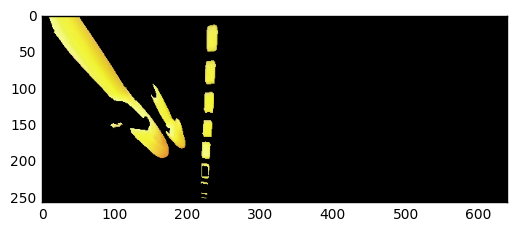

In [105]:
#NEW PAR7
#COLOR THRESHOLDS
lower_white = np.array([0,0,150])
upper_white = np.array([255,25,255])


lower_orange1 = np.array([5,100,150])
upper_orange1 = np.array([15,255,255])

lower_orange1 = np.array([0,100,100])
upper_orange1 = np.array([15,255,255])

lower_orange2 = np.array([170,100,100])
upper_orange2 = np.array([180,255,255])

lower_orange2 = np.array([170,100,100])
upper_orange2 = np.array([170,100,100])


lower_yellow = np.array([15,100,200]) 
upper_yellow = np.array([35, 255, 255])


# Threshold the HSV image to get the specific colors
print "White filtered img"
start = time.time()
mask_trala = cv2.inRange(hsv, lower_white, upper_white)
end = time.time()
print end-start
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala)
plt.imshow(res[:,:,::-1]); plt.show()
#plt.imshow(mask_trala, cmap='gray'); plt.show()

print "Orange filtered img"
start = time.time()
mask_trala1 = cv2.inRange(hsv, lower_orange1, upper_orange1)
end = time.time()
print end-start

start = time.time()
mask_trala2 = cv2.inRange(hsv, lower_orange2, upper_orange2)
end = time.time()
print end-start

res = cv2.bitwise_and(im_test,im_test, mask= (mask_trala1+mask_trala2))
plt.imshow(res[:,:,::-1]); plt.show()
#plt.imshow(mask_trala1+mask_trala2, cmap='gray'); plt.show()

print "Yellow filtered img"
start = time.time()
mask_trala3 = cv2.inRange(hsv, lower_yellow, upper_yellow)
end = time.time()
res = cv2.bitwise_and(im_test,im_test, mask= mask_trala3)
plt.imshow(res[:,:,::-1]); plt.show()
#plt.imshow(mask_trala3, cmap='gray'); plt.show()


VERUNDGUNG BEIDE BILDER TOOK:
0.000547885894775
COMBINED PICTURE


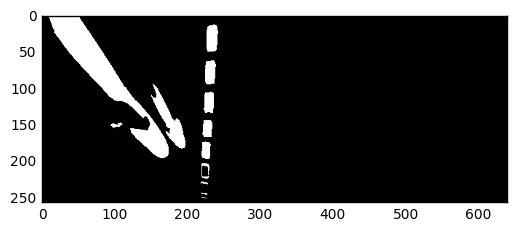

SEGMENTING IMAGE TOOK: seconds
0.00153112411499
REGIONPROPS TOOK: seconds
0.00096583366394


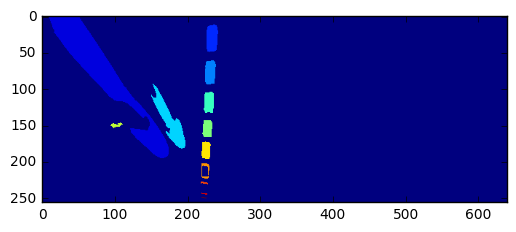

640.131
REDING IMG TOOK:
0.0011088848114


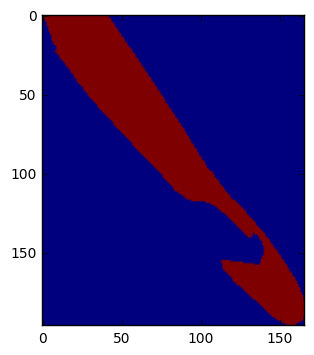

82
78
82
78
WIDTH
38
HEIGHT
48
127
(4965.43579103515, 93.670909118180134)
53.0093690536
True
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
617.329039869
MAJOR AXIS
281.863393609
1.09508551637
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
REDING IMG TOOK:
0.000263214111328


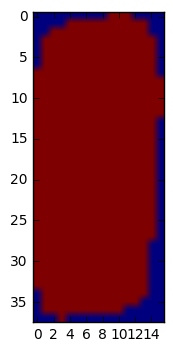

18
7
18
7
WIDTH
14
HEIGHT
35
127
(102.20097999463799, 17.520115934127418)
5.83335066839
True
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
95.7989898732
MAJOR AXIS
40.4378001369
1.18452276767
REDING IMG TOOK:
9.82284545898e-05


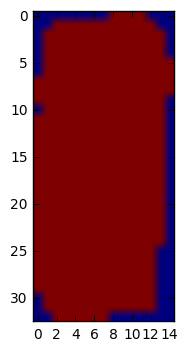

15
6
15
6
WIDTH
13
HEIGHT
31
127
(81.003663169481811, 15.171334126353685)
5.33925774061
True
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
86.3847763109
MAJOR AXIS
36.0008140285
1.19976143099
REDING IMG TOOK:
0.000143051147461


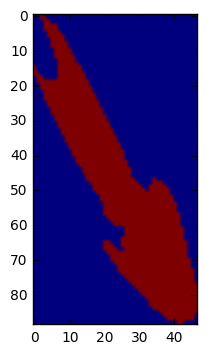

50
25
50
25
WIDTH
21
HEIGHT
35
127
(577.05231887425907, 23.824096647873432)
24.2213724786
True
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
250.557395207
MAJOR AXIS
96.0876532234
1.30379599668
!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111
REDING IMG TOOK:
9.20295715332e-05


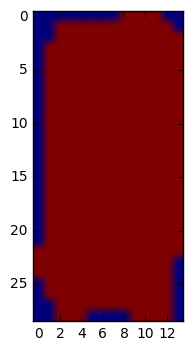

14
6
14
6
WIDTH
12
HEIGHT
26
127
(63.052641384452116, 13.614998433752945)
4.63111631568
True
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
78.1421356237
MAJOR AXIS
31.7622773452
1.23010914448
REDING IMG TOOK:
0.000105857849121


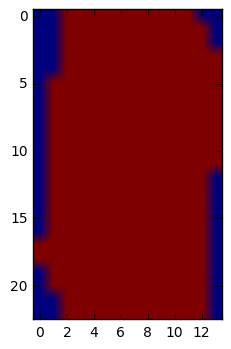

11
6
11
6
WIDTH
12
HEIGHT
22
127
(41.915213041780717, 12.440152382609952)
3.36934884338
True
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
65.8994949366
MAJOR AXIS
25.8967837514
1.27234902158
REDING IMG TOOK:
6.79492950439e-05


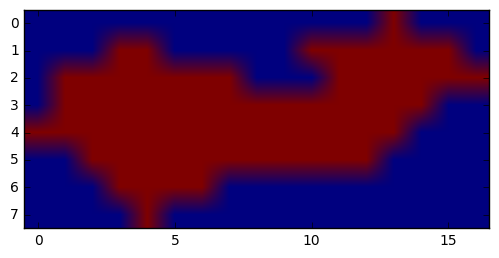

3
7
3
7
WIDTH
13
HEIGHT
3
127
(18.677219057875796, 2.0833410890479929)
8.96503177327
False
REDING IMG TOOK:
8.29696655273e-05


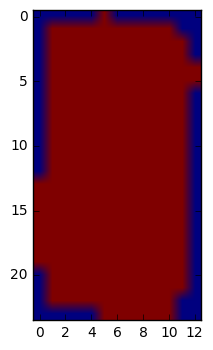

11
5
11
5
WIDTH
10
HEIGHT
23
127
(41.776554446537709, 10.621989864985729)
3.93302525963
False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
64.7279220614
MAJOR AXIS
25.8539140392
1.25180121593
REDING IMG TOOK:
7.5101852417e-05


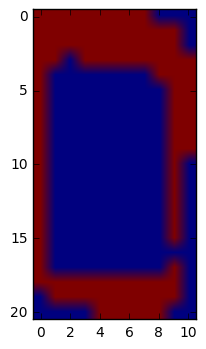

8
4
8
4
WIDTH
10
HEIGHT
20
127
(51.996363991587444, 12.578288786190338)
4.13381858816
False
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
PERIMETER IS:
74.313708499
MAJOR AXIS
28.8434017388
1.28822718575
REDING IMG TOOK:
6.91413879395e-05


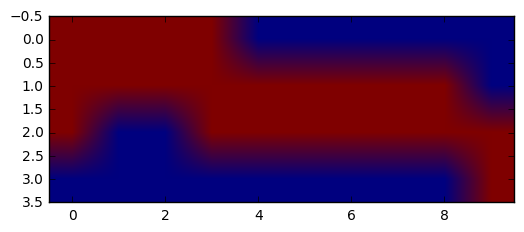

1
4
1
4
WIDTH
8
HEIGHT
1
127
(8.6599480213219007, 0.44129164809958432)
19.6240922723
False
REDING IMG TOOK:
7.31945037842e-05


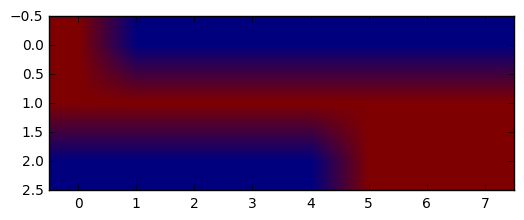

1
3
1
3
WIDTH
7
HEIGHT
0
127
(6.2633497746480415, 0.18109466979640221)
34.5860525972
False
ITERATING THROUGH TOOK: s
0.436017036438


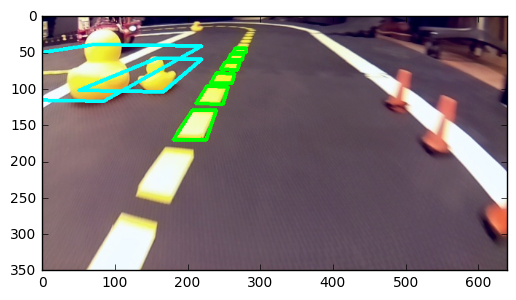

In [106]:
#NORMAL ALGORITHM STARTS

#plt.imshow(mask_trala1+mask_trala2+mask_trala3, cmap='gray'); plt.show()
im1_cropped = im1[130:,:,:] #do this to being able to tune only staying in here
start = time.time()
#mask = np.bitwise_or((mask_trala3/2),mask_trala1+mask_trala2)
#mask = mask_trala1+mask_trala2
mask = mask_trala3/2
end = time.time()
print "VERUNDGUNG BEIDE BILDER TOOK:"
print (end-start)
print "COMBINED PICTURE"
plt.imshow(mask,cmap='gray');plt.show()
#show "yellow-filtered image

#--------------------SEGMENT AND EVALUATE-----------------------------------------------------------------

#ÜBERPRÜFUNG OB NACH GELBFILTER WAS ÜBRIGGEBLIEBEN IST:
if(np.sum(mask)!=0):
    
    start = time.time()
    final=measure.label(mask)
    end = time.time()
    print "SEGMENTING IMAGE TOOK: seconds"
    print(end - start)
    
    #NOT WORKING NOW
    #start = time.time()
    #print np.shape(final)
    #abc=measure.perimeter(erf,neighbourhood=8)
    #end = time.time()
    #print "PERIMETER TOOK: seconds"
    #print(end - start)
    
    
    start = time.time()
    props=measure.regionprops(final,mask)
    end = time.time()
    print "REGIONPROPS TOOK: seconds"
    print(end - start)
    plt.imshow(final); plt.show()
    
    i=np.max(final)
    
    #-----------------------FILTER MUSS TIEFENABHÄNGIG WERDEN!!!-------------------------------------------
    print np.max(pts2[0])
    start = time.time()
    for k in range(1,i+1): #durch alle zahlen durchiterieren
        #first only keep large elements then eval their shape        
        if (props[k-1]['area']>10):
            
            start = time.time()
            abc = np.array(props[k-1]['intensity_image'])
            abc1 = np.array(np.array(props[k-1]['intensity_image'])[int(props[k-1]['weighted_local_centroid'][0]),:])
            abc2 = np.array(np.array(props[k-1]['intensity_image'])[:,int(props[k-1]['weighted_local_centroid'][1])])
            end = time.time()
            print "REDING IMG TOOK:"
            print end-start
            #print abc[:,1]
            #print np.shape(abc)
            plt.imshow(abc);plt.show()
            print int(props[k-1]['local_centroid'][0])
            print int(props[k-1]['local_centroid'][1])
            
            print int(props[k-1]['weighted_local_centroid'][0])
            print int(props[k-1]['weighted_local_centroid'][1])
            
            #abc1 = np.array(abc[int(props[k-1]['local_centroid'][0]),:])
            #print np.shape(abc1)
            #print np.shape(abc1)
            #print abc1
            #abc2 = np.array(abc[:,int(props[k-1]['local_centroid'][1])])
            #print np.shape(abc2)
            #print abc2
            
            first_max = np.argmax(abc1)
            last_max = np.argmax(np.flipud(abc1))
            width = np.shape(abc1)[0]-(1+last_max)-first_max
            print "WIDTH"
            print width
            
            first_max = np.argmax(abc2)
            last_max = np.argmax(np.flipud(abc2))
            height = np.shape(abc2)[0]-(1+last_max)-first_max
            print "HEIGHT"
            print height
            
            
                        
            
            color_info = props[k-1]['max_intensity']
            print color_info
            print props[k-1]['inertia_tensor_eigvals']
            print props[k-1]['inertia_tensor_eigvals'][0]/props[k-1]['inertia_tensor_eigvals'][1]
            #top=props[k-1]['bbox'][0]
            #bottom=props[k-1]['bbox'][2]
            #left=props[k-1]['bbox'][1]
            #right=props[k-1]['bbox'][3]
            #total_width = right - left
            print width>10 and height>10
            #if ((color_info == 127 and (width>10 and height>10)) or (color_info ==255 and (width<10 or height<10))):
            #if ((color_info == 127 and total_width > 10) or (color_info == 255 and (0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']<1.0))):
            if ((color_info == 127 and props[k-1]['inertia_tensor_eigvals'][0]>20) or \
            (color_info ==255 and \
            props[k-1]['inertia_tensor_eigvals'][0]/props[k-1]['inertia_tensor_eigvals'][1]>50)): 
                print "!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!NEW OBJECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"

                top=props[k-1]['bbox'][0]
                bottom=props[k-1]['bbox'][2]
                left=props[k-1]['bbox'][1]
                right=props[k-1]['bbox'][3]
                print "PERIMETER IS:"
                print props[k-1]['perimeter']
                print "MAJOR AXIS"
                print props[k-1]['major_axis_length']
                print 0.5*props[k-1]['perimeter']/props[k-1]['major_axis_length']

                #TRY TO LOOK WHETHER THERE IS WHITE IN BETWEEN
                #calc center in top view image
                center_x = 250
                center_y = 250
                #print "THATS THE LINE"
                #line =  measure.profile_line(final, (center_x,center_y), (bottom,left), linewidth=1, order=1, mode='constant')
                #print line
                #print "THATS THE LINE"
                line1 =  np.array([measure.profile_line(hsv, (center_y,center_x), (top,left+0.5*(left-right)), linewidth=1, order=1, mode='constant')])
                #bottom,left
                line1 =  cv2.inRange(line1, lower_white, upper_white)
                summe = np.sum(line1==255)
                #print summe
                if (summe>3):
                    print "!!!!!!!!!!!!!!!!!BEHIND A LINE!!!!!!!!!!!!!!!!!!111"

                #line1 =  np.array([measure.profile_line(grayscale, (center_x,center_y), (bottom,left), linewidth=1, order=1, mode='constant')])
                #print line1
                #print np.max(line1)
                #mask = cv2.inRange(line1, lower_white, upper_white)
                #print mask
                #plt.imshow(line1); plt.show()
                #plt.imshow(hsv);plt.show()
                #plt.imshow(mask,cmap='gray'); plt.show()


                #transform points back
                points = np.float32([[left,top],[left,bottom],[right,bottom],[right,top]])
                #print np.shape(points)
                points = np.array([points])
                #print np.shape(points)
                trans_points = np.float32(cv2.perspectiveTransform(points,inv_M))
                pts = np.concatenate((np.reshape(trans_points[:,:,0],(1,-1)), np.reshape(trans_points[:,:,1],(1,-1))), axis=0)
                #print np.shape(pts)
                if (np.max(line1)>180):
                    cv2.polylines(im1_cropped,np.int32([np.transpose(pts)]),True,(255,255,0),3)
                else:
                    cv2.polylines(im1_cropped,np.int32([np.transpose(pts)]),True,(0,255,0),3)
                #cv2.rectangle(im_test,(left,top),(right,bottom),(0,255,0),3)

    #eig box np.min breite und höhe!! if they passed the test!!!!
    #print abc
    end = time.time()
    print "ITERATING THROUGH TOOK: s"
    print(end - start)
    #plt.imshow(final); plt.show()
#last_img=np.concatenate((im1_orig[:,:,::-1],im1_cropped[:,:,::-1]),axis=1)
#plt.imshow(last_img); plt.show()
plt.imshow(im1_cropped[:,:,::-1]); plt.show()
#just warp image back,...
#im_test = cv2.warpPerspective(im_test,inv_M,(650,340)) #for dori
#plt.imshow(im_test); plt.show()



In [91]:
A=[]
A.append([[3],[4]])
A.append([[1],[2]])
del A[0]
#A.remove([[3],[4]])
#A.remove([[1],[2]])
print A
A.append([[1],[2]])
A.insert(1,[[35],[40]])
print A

[[[1], [2]]]
[[[1], [2]], [[35], [40]], [[1], [2]]]


In [84]:
A = np.array([[1],[2]])
position = np.array([[3],[4]])
A = np.append(A,position,axis=1)
print A
print np.shape(A)
print A[:,(A[0,:]==3)]
print np.argmax(A[0,:]==3)

[[1 3]
 [2 4]]
(2, 2)
[[3]
 [4]]
1


In [ ]:
conv = cv2.cvtColor(funky_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite( 'data/funky_rgb.png', conv)